In [1]:
import pandas as pd

In [2]:
H = pd.read_csv("hofmarcher_results.csv")
H = H.reset_index()
H["index"] = H["index"]+1
H

,index,Assay,ResNet,DenseNet,GapNet,M-CNN,MIL-Net,SC-CNN,FNN
0,1,CHEMBL1040691,0.382,0.354,0.400,0.344,0.336,0.390,0.546
1,2,CHEMBL1614544,0.714,0.687,0.679,0.722,0.725,0.616,0.606
2,3,CHEMBL1613914,0.544,0.534,0.511,0.547,0.508,0.565,0.402
3,4,CHEMBL1613836,0.492,0.466,0.448,0.461,0.503,0.401,0.511
4,5,CHEMBL1613838,0.436,0.496,0.434,0.480,0.552,0.491,0.578
...,...,...,...,...,...,...,...,...,...
204,205,CHEMBL3214913,0.839,0.881,0.856,0.764,0.731,0.799,0.623
205,206,CHEMBL3214967,0.761,0.822,0.856,0.719,0.670,0.739,0.708
206,207,CHEMBL3214906,0.562,0.650,0.547,0.482,0.574,0.550,0.483
207,208,CHEMBL3214970,0.828,0.812,0.801,0.719,0.721,0.716,0.584


In [3]:
columnsindex = pd.read_csv("data/column-assay-index.csv").reset_index()
columnsindex["index"] = columnsindex["index"]+1
columnsindex

,index,ASSAY_ID,CHEMBL_ID
0,1,600885,CHEMBL1040691
1,2,688422,CHEMBL1614544
2,3,688493,CHEMBL1613914
3,4,688810,CHEMBL1613836
4,5,688812,CHEMBL1613838
...,...,...,...
204,205,1301866,CHEMBL3214913
205,206,1301890,CHEMBL3214967
206,207,1301859,CHEMBL3214906
207,208,1301893,CHEMBL3214970


In [4]:
H.Assay.to_list()==columnsindex.CHEMBL_ID.to_list()

True

In [5]:
S = pd.read_csv("scaffold_mean_AUCSeal_individualmodels.csv").rename(columns={"AUC": "Cell Count"})
S

,Unnamed: 0,Task,Cell Count
0,0,1,0.550831
1,1,10,0.445697
2,2,100,0.910435
3,3,101,0.972066
4,4,102,0.853547
...,...,...,...
204,204,95,0.901316
205,205,96,0.888889
206,206,97,0.916667
207,207,98,0.912464


In [6]:
results = pd.merge(H, S, left_on="index", right_on="Task")
results = results= results[['Task', 'Cell Count', 'ResNet', 'DenseNet', 
                            'GapNet', 'M-CNN', 'MIL-Net','SC-CNN', 'FNN' ]]
results

,Task,Cell Count,ResNet,DenseNet,GapNet,M-CNN,MIL-Net,SC-CNN,FNN
0,1,0.550831,0.382,0.354,0.400,0.344,0.336,0.390,0.546
1,2,0.441415,0.714,0.687,0.679,0.722,0.725,0.616,0.606
2,3,0.809348,0.544,0.534,0.511,0.547,0.508,0.565,0.402
3,4,0.510897,0.492,0.466,0.448,0.461,0.503,0.401,0.511
4,5,0.508333,0.436,0.496,0.434,0.480,0.552,0.491,0.578
...,...,...,...,...,...,...,...,...,...
204,205,0.664955,0.839,0.881,0.856,0.764,0.731,0.799,0.623
205,206,0.486700,0.761,0.822,0.856,0.719,0.670,0.739,0.708
206,207,0.642857,0.562,0.650,0.547,0.482,0.574,0.550,0.483
207,208,0.633442,0.828,0.812,0.801,0.719,0.721,0.716,0.584


In [14]:
import numpy as np

# Calculate mean and standard deviation for each numeric column
stats = results.drop(columns=['Task']).agg([np.mean, np.std]).transpose()
stats['mean+-std dev'] = stats['mean'].round(2).astype(str) + '+-' + stats['std'].round(2).astype(str)
stats

,mean,std,mean+-std dev
Cell Count,0.676478,0.207838,0.68+-0.21
ResNet,0.731177,0.192322,0.73+-0.19
DenseNet,0.730388,0.189188,0.73+-0.19
GapNet,0.724703,0.192430,0.72+-0.19
M-CNN,0.705191,0.193273,0.71+-0.19
MIL-Net,0.711416,0.180503,0.71+-0.18
SC-CNN,0.705182,0.198565,0.71+-0.2
FNN,0.674856,0.197592,0.67+-0.2


In [19]:
(0.731177-0.676478)/0.731177

0.07480951944604376

In [15]:

# Create DataFrame
venndf = results

# Function to count values above a threshold
def count_above_threshold(column, threshold):
    return (venndf[column] >= threshold).sum()

# Define thresholds
thresholds = [0.999, 0.9, 0.8, 0.7, 0.5]

# Calculate counts for each model and threshold
count_data = {}
for col in venndf.columns[1:]:  # Exclude 'Assay' and 'CHEMBL_ID'
    count_data[col] = {f'>{threshold}': count_above_threshold(col, threshold) for threshold in thresholds}

# Convert the results to a DataFrame
venndfcount_df = pd.DataFrame(count_data).transpose()

venndfcount_df


,>0.999,>0.9,>0.8,>0.7,>0.5
Cell Count,0,57,73,82,168
ResNet,0,66,85,114,178
DenseNet,0,65,93,113,178
GapNet,0,60,88,115,179
M-CNN,0,59,71,100,175
MIL-Net,0,58,72,100,187
SC-CNN,0,63,71,104,172
FNN,0,54,69,78,170


In [20]:
73/85

0.8588235294117647

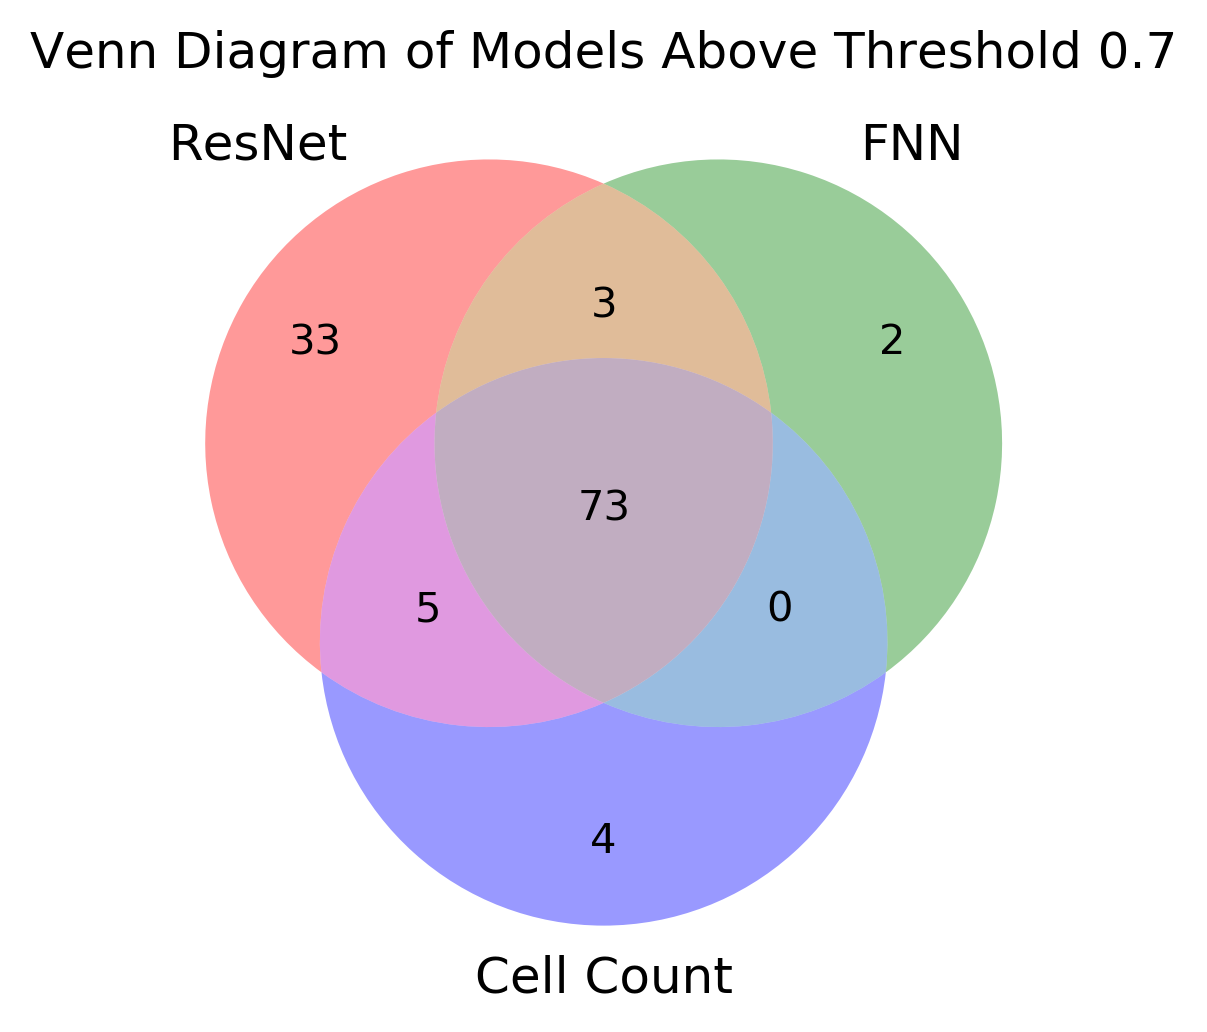

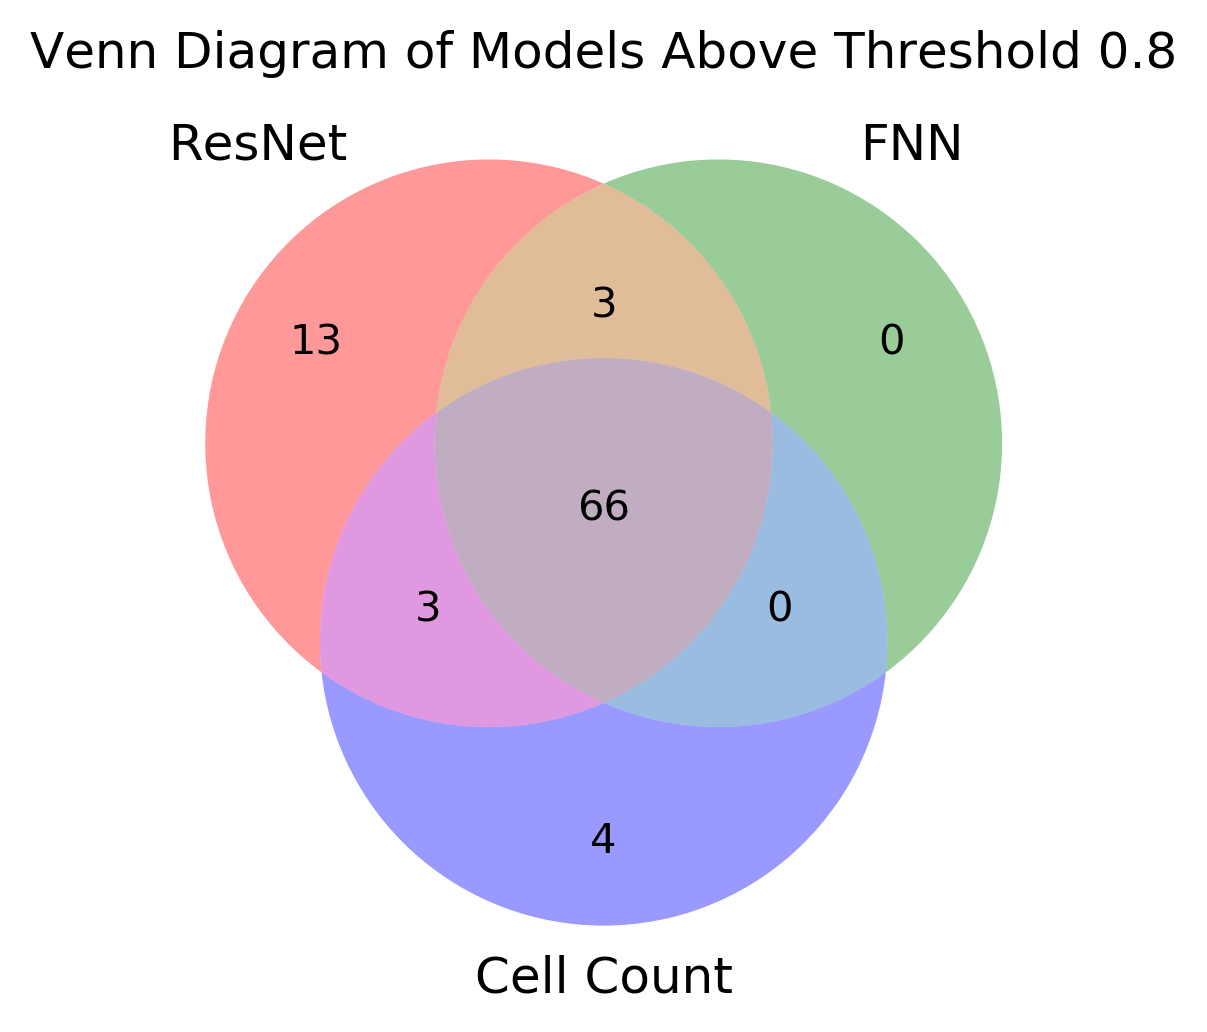

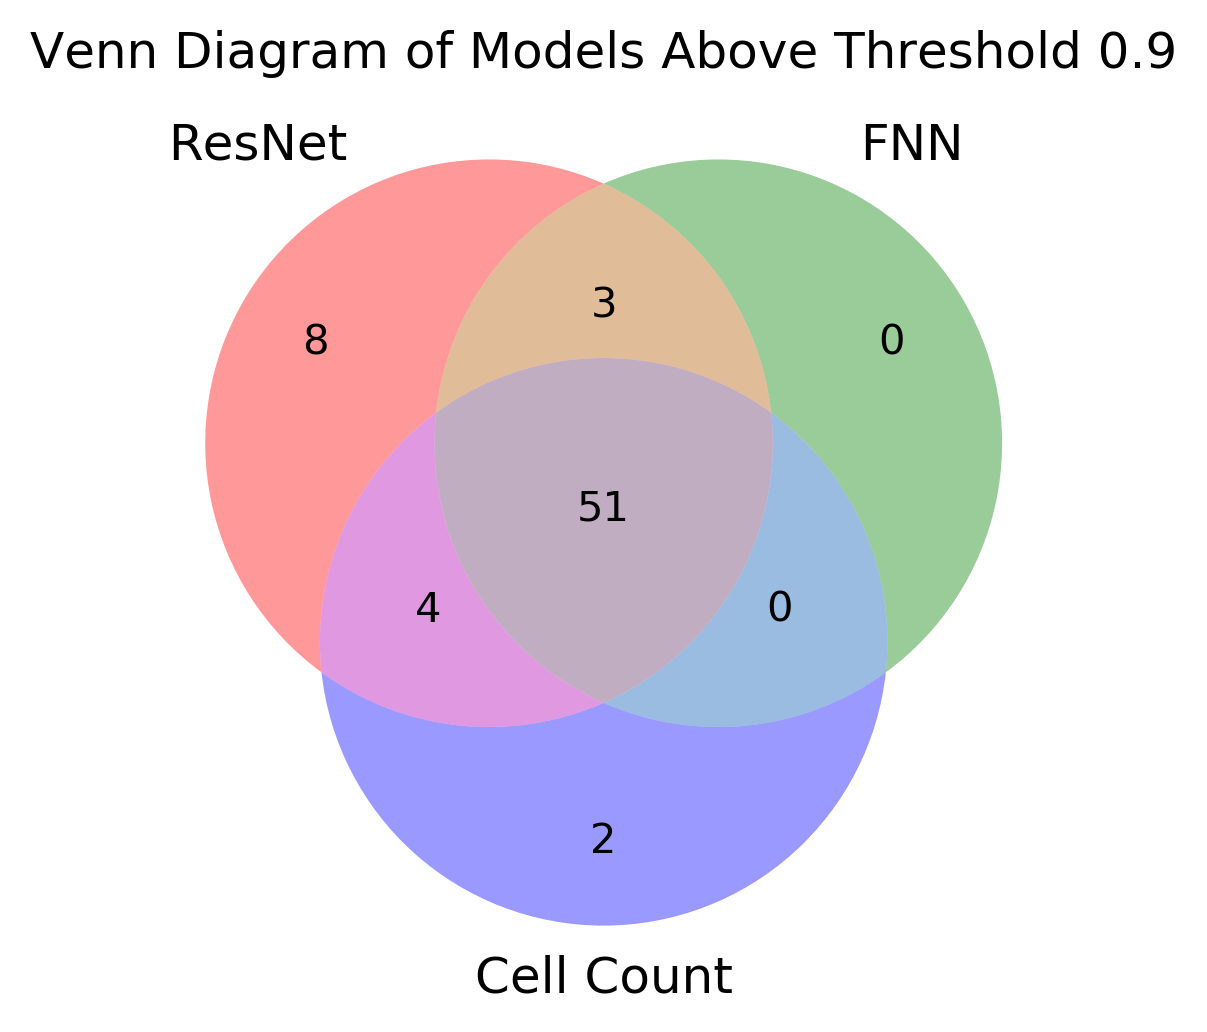

In [18]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted



# Define threshold
threshold = 0.7

# Get sets of indices for each model where the values are above the threshold
densenet_set = set(venndf.index[venndf['ResNet'] > threshold])
fnn_set = set(venndf.index[venndf['FNN'] > threshold])
cellcounter_set = set(venndf.index[venndf['Cell Count'] > threshold])

# Create the Venn diagram
plt.figure(figsize=(4, 4), dpi=300)
venn3_unweighted([densenet_set, fnn_set, cellcounter_set], ('ResNet', 'FNN', 'Cell Count'))
plt.title('Venn Diagram of Models Above Threshold 0.7')
plt.show()


# Define threshold
threshold = 0.8

# Get sets of indices for each model where the values are above the threshold
densenet_set = set(venndf.index[venndf['ResNet'] > threshold])
fnn_set = set(venndf.index[venndf['FNN'] > threshold])
cellcounter_set = set(venndf.index[venndf['Cell Count'] > threshold])

# Create the Venn diagram
plt.figure(figsize=(4, 4), dpi=300)
venn3_unweighted([densenet_set, fnn_set, cellcounter_set], ('ResNet', 'FNN', 'Cell Count'))
plt.title('Venn Diagram of Models Above Threshold 0.8')
plt.show()


# Define threshold
threshold = 0.9

# Get sets of indices for each model where the values are above the threshold
densenet_set = set(venndf.index[venndf['ResNet'] > threshold])
fnn_set = set(venndf.index[venndf['FNN'] > threshold])
cellcounter_set = set(venndf.index[venndf['Cell Count'] > threshold])

# Create the Venn diagram
plt.figure(figsize=(4, 4), dpi=300)
venn3_unweighted([densenet_set, fnn_set, cellcounter_set], ('ResNet', 'FNN', 'Cell Count'))
plt.title('Venn Diagram of Models Above Threshold 0.9')
plt.show()

In [12]:
print(len(results))

209


In [13]:

# Filtering rows where both columns "64" and "AUC_C" are more than 0.5
Filteredresults = results[(results['Cell Count'] >= 0.5) | (results["ResNet"] >= 0.5)| (results["DenseNet"] >= 0.5) |(results["GapNet"] >= 0.5) | (results["M-CNN"] >= 0.5)| (results["MIL-Net"] >= 0.5) |(results["SC-CNN"] >= 0.5)|(results["FNN"] >= 0.5)]
print(len(Filteredresults))

205


In [48]:
Filteredresults

,Task,Cell Count,ResNet,DenseNet,GapNet,M-CNN,MIL-Net,SC-CNN,FNN
0,1,0.550831,0.382,0.354,0.400,0.344,0.336,0.390,0.546
1,2,0.441415,0.714,0.687,0.679,0.722,0.725,0.616,0.606
2,3,0.809348,0.544,0.534,0.511,0.547,0.508,0.565,0.402
3,4,0.510897,0.492,0.466,0.448,0.461,0.503,0.401,0.511
4,5,0.508333,0.436,0.496,0.434,0.480,0.552,0.491,0.578
...,...,...,...,...,...,...,...,...,...
204,205,0.664955,0.839,0.881,0.856,0.764,0.731,0.799,0.623
205,206,0.486700,0.761,0.822,0.856,0.719,0.670,0.739,0.708
206,207,0.642857,0.562,0.650,0.547,0.482,0.574,0.550,0.483
207,208,0.633442,0.828,0.812,0.801,0.719,0.721,0.716,0.584


In [49]:
# Melt the DataFrame
melted_df = pd.melt(Filteredresults, id_vars="Task", var_name="Method", value_name="AUC")
melted_df

,Task,Method,AUC
0,1,Cell Count,0.550831
1,2,Cell Count,0.441415
2,3,Cell Count,0.809348
3,4,Cell Count,0.510897
4,5,Cell Count,0.508333
...,...,...,...
1635,205,FNN,0.623000
1636,206,FNN,0.708000
1637,207,FNN,0.483000
1638,208,FNN,0.584000


In [50]:
melted_df.Method.unique()

array(['Cell Count', 'ResNet', 'DenseNet', 'GapNet', 'M-CNN', 'MIL-Net',
       'SC-CNN', 'FNN'], dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
Cell Count v.s. ResNet: Wilcoxon test (paired samples) with Bonferroni correction, P_val=4.724e-09 stat=5.424e+03
Using zero_method  wilcox
ResNet v.s. FNN: Wilcoxon test (paired samples) with Bonferroni correction, P_val=5.656e-14 stat=3.990e+03
Using zero_method  wilcox
Cell Count v.s. FNN: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=1.015e+04


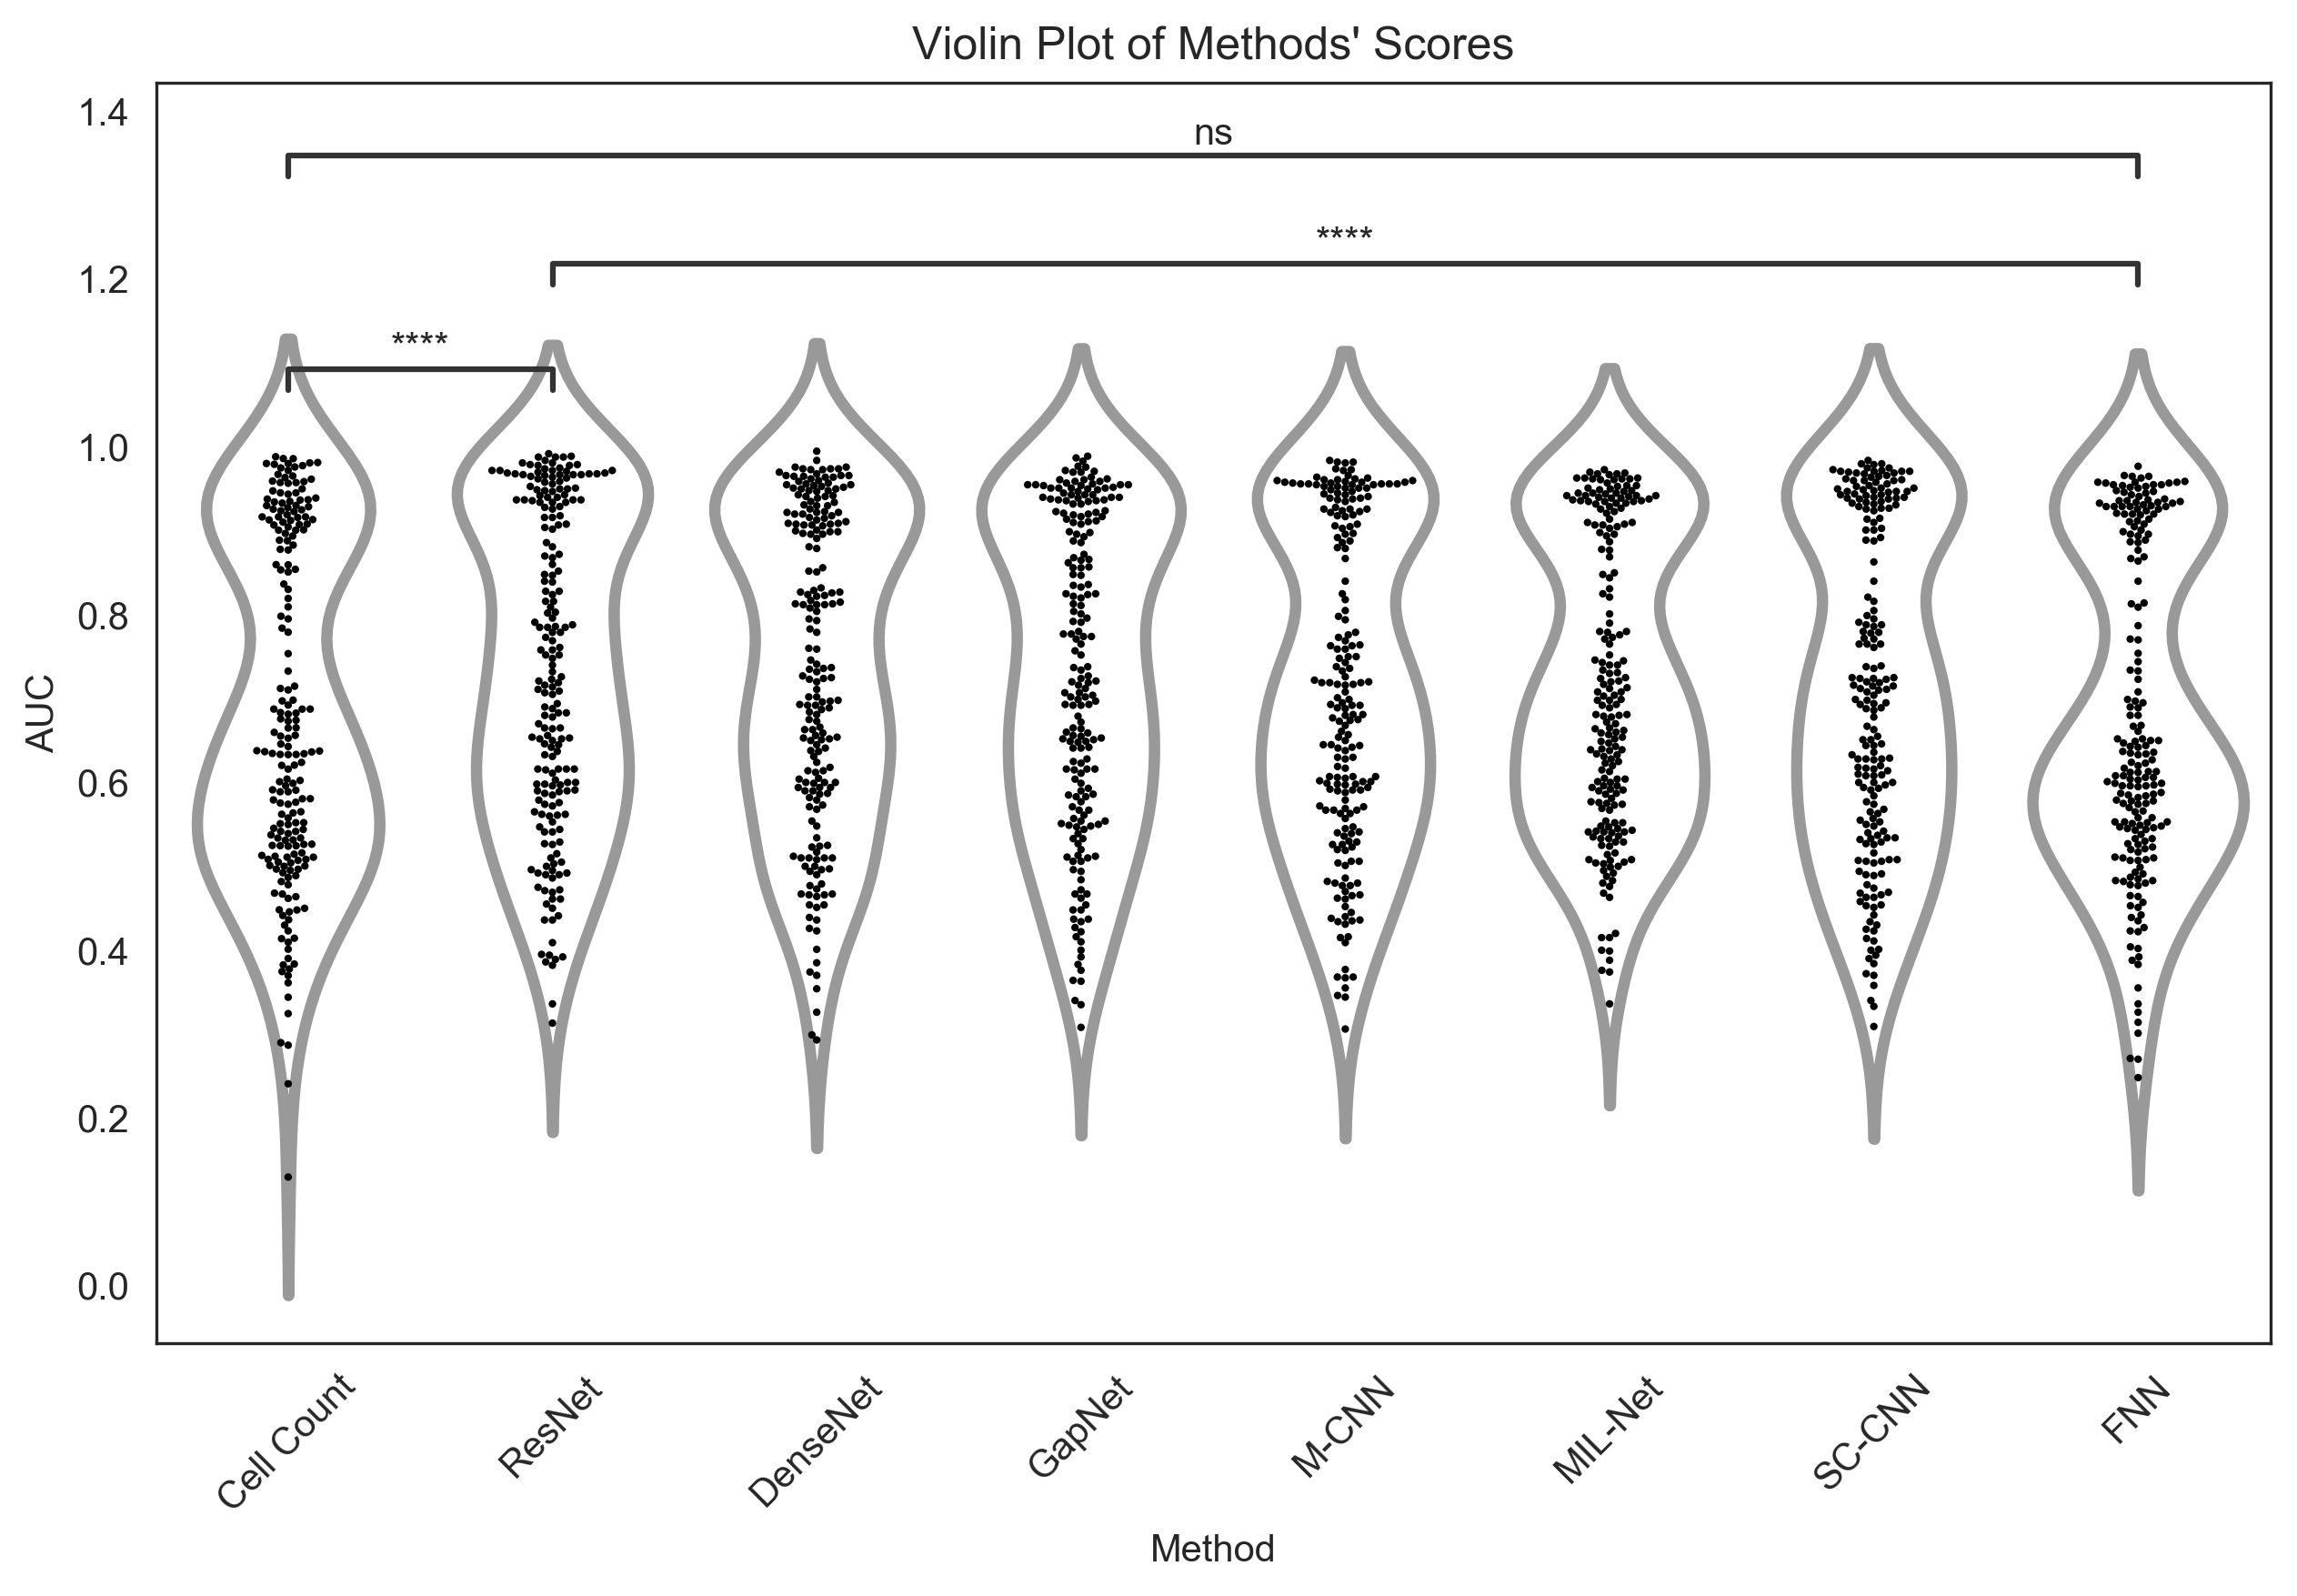

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

# Set plot background to white
sns.set_style("white")

# Assuming 'melted_df' is your dataframe
plt.figure(figsize=(10, 6), dpi=300)

# Create the violin plot
sns.violinplot(x="Method", y="AUC", data=melted_df, inner=None,  linewidth=3, color="white", edgecolor="black")

# Add the swarm plot with smaller dots
sns.swarmplot(x="Method", y="AUC", data=melted_df, color="k", alpha=1, size=2)

# Rotate the x-ticks for better readability
plt.xticks(rotation=45)

# Set the title of the plot
plt.title("Violin Plot of Methods' Scores")

# Add statistical annotations
add_stat_annotation(plt.gca(), data=melted_df, x="Method", y="AUC",
                    box_pairs=[("ResNet", "FNN"), ("ResNet", "Cell Count"), ("FNN", "Cell Count")],
                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)

# Display the plot
plt.show()


In [71]:

# Filtering rows where both columns "64" and "AUC_C" are more than 0.5
Filteredresults = results[(results['Cell Count'] > 0.5) | (results["ResNet"] > 0.5)| (results["FNN"] > 0.5)]
print(len(Filteredresults))

# Melt the DataFrame
melted_df = pd.melt(Filteredresults, id_vars="Task", var_name="Method", value_name="AUC")
melted_df

202


,Task,Method,AUC
0,1,Cell Count,0.550831
1,2,Cell Count,0.441415
2,3,Cell Count,0.809348
3,4,Cell Count,0.510897
4,5,Cell Count,0.508333
...,...,...,...
1611,205,FNN,0.623000
1612,206,FNN,0.708000
1613,207,FNN,0.483000
1614,208,FNN,0.584000


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
ResNet v.s. FNN: Wilcoxon test (paired samples) with Bonferroni correction, P_val=2.151e-13 stat=3.970e+03
Using zero_method  wilcox
Cell Count v.s. ResNet: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.024e-08 stat=5.335e+03
Using zero_method  wilcox
Cell Count v.s. FNN: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=9.901e+03


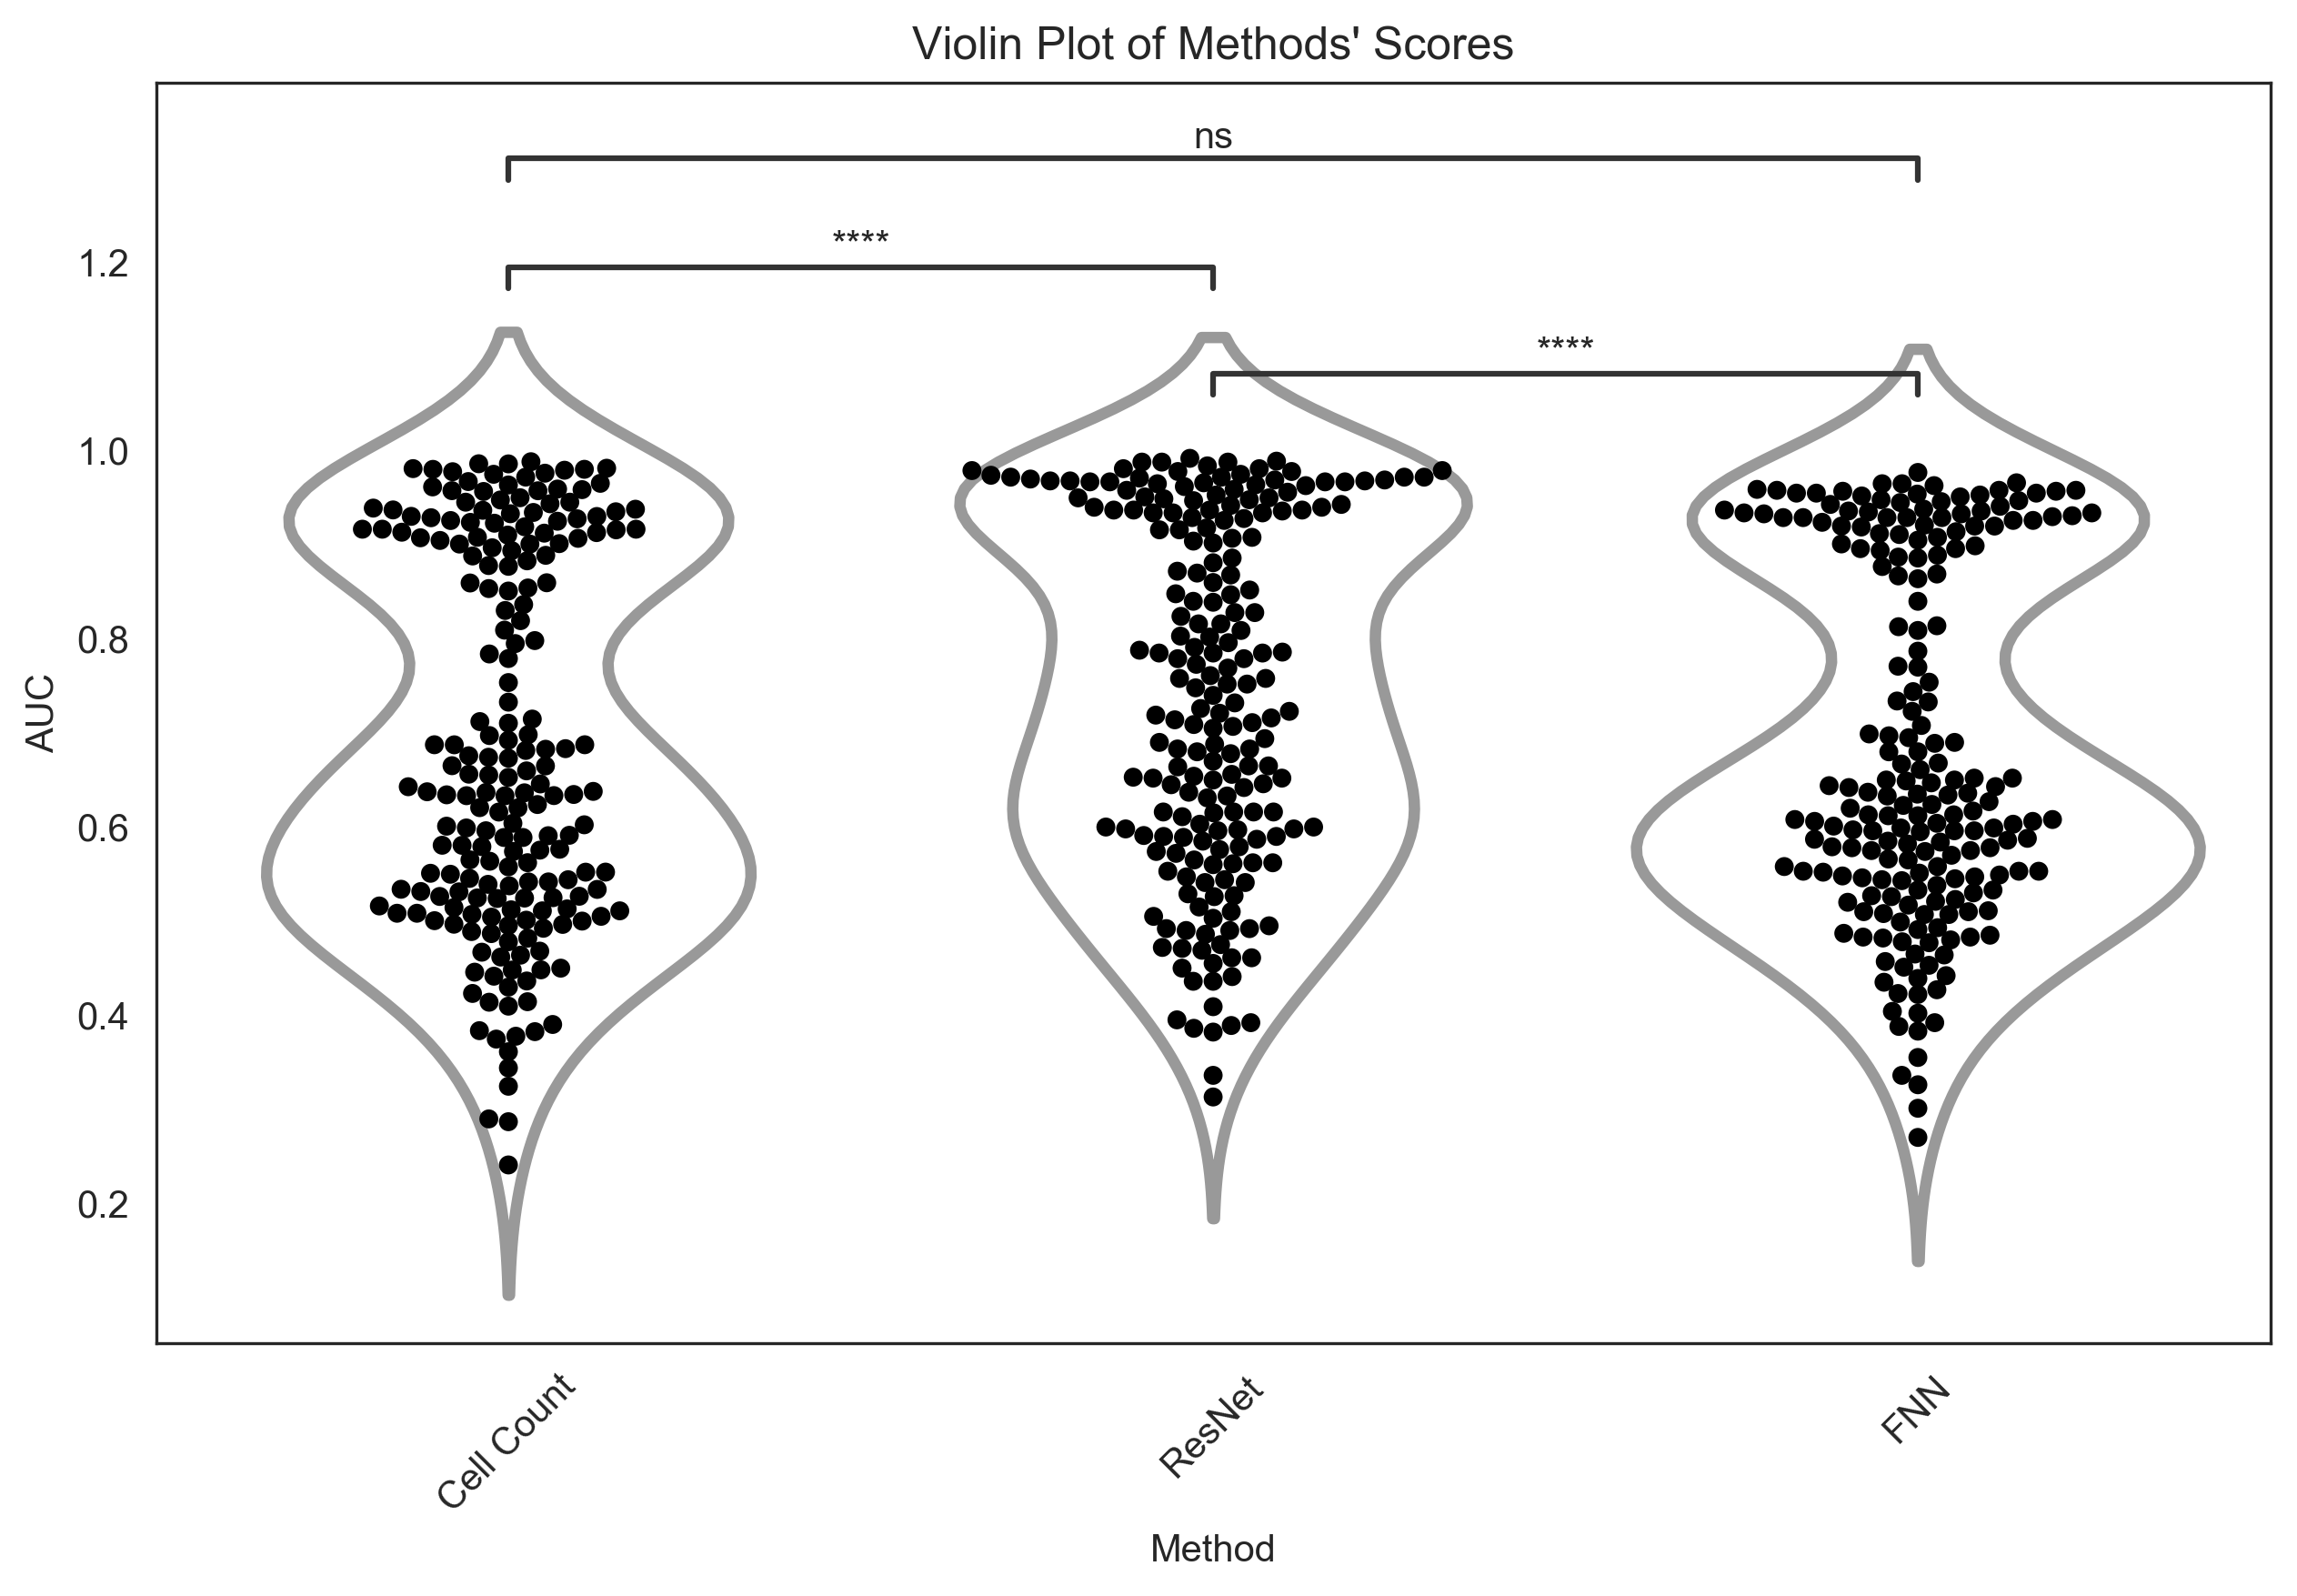

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

melted_df = melted_df[melted_df.Method.isin(['Cell Count', 'ResNet', 'FNN'])]
# melted_df.loc[melted_df['AUC'] < 0.50, 'AUC'] = 0.50

# Set plot background to white
sns.set_style("white")

# Assuming 'melted_df' is your dataframe
plt.figure(figsize=(10, 6), dpi=300)

# Create the violin plot
sns.violinplot(x="Method", y="AUC", data=melted_df, inner=None,  linewidth=3, color="white", edgecolor="black")

# Add the swarm plot with smaller dots
sns.swarmplot(x="Method", y="AUC", data=melted_df, color="k", alpha=1, size=5)

# Rotate the x-ticks for better readability
plt.xticks(rotation=45)

# Set the title of the plot
plt.title("Violin Plot of Methods' Scores")

# Add statistical annotations
add_stat_annotation(plt.gca(), data=melted_df, x="Method", y="AUC",
                    box_pairs=[("ResNet", "FNN"), ("ResNet", "Cell Count"), ("FNN", "Cell Count")],
                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)

# Display the plot
plt.show()


In [73]:
melted_df.groupby("Method").mean()

,Task,AUC
Method,,
Cell Count,105.737624,0.688687
FNN,105.737624,0.686495
ResNet,105.737624,0.741817


In [58]:
from scipy.stats import ttest_rel, wilcoxon, shapiro
import pandas as pd
from itertools import combinations

# Pivot the data to have methods as columns and tasks as rows
pivot_df = melted_df.pivot(index='Task', columns='Method', values='AUC')

# Drop any rows with missing values (if any)
pivot_df = pivot_df.dropna()

# Get the list of methods (columns)
methods = pivot_df.columns.tolist()

# Iterate through all combinations of two methods
for method1, method2 in combinations(methods, 2):
    print(f"\nComparing {method1} vs {method2}")
    
    # Calculate the differences between the two methods
    differences = pivot_df[method1] - pivot_df[method2]

    # Check normality using Shapiro-Wilk test
    stat, p_value = shapiro(differences)
    
    if p_value >= 0.05:
        # Normal distribution is satisfied, perform paired t-test
        test_stat, test_p_value = ttest_rel(pivot_df[method1], pivot_df[method2])
        test_name = "Paired t-test"
    else:
        # Normal distribution is not satisfied, perform Wilcoxon signed-rank test
        test_stat, test_p_value = wilcoxon(pivot_df[method1], pivot_df[method2])
        test_name = "Wilcoxon signed-rank test"

    # Output the results
    print(f"Test used: {test_name}")
    print(f"Shapiro-Wilk normality p-value: {p_value}")
    print(f"Test statistic: {test_stat}")
    print(f"p-value: {test_p_value}")




Comparing Cell Count vs FNN
Test used: Wilcoxon signed-rank test
Shapiro-Wilk normality p-value: 1.2095920283172745e-06
Test statistic: 10080.0
p-value: 0.7446001311133895

Comparing Cell Count vs ResNet
Test used: Wilcoxon signed-rank test
Shapiro-Wilk normality p-value: 3.645368451543618e-06
Test statistic: 5335.0
p-value: 2.1254119685642563e-09

Comparing FNN vs ResNet
Test used: Wilcoxon signed-rank test
Shapiro-Wilk normality p-value: 2.7889336706721224e-07
Test statistic: 3972.0
p-value: 4.387777159178338e-14
